In [1]:
from rl_environment import Rl_env
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def make_simple_dataset(how_many,rl_env,prediction_variable='Close'):
    x = []
    y = []
    y_inv_trans = []
    indexes = []
    for i in range(how_many):
        indexes.append(rl_env.current_index()[0])
        x.append(rl_env.state.to_numpy())
        next_day = rl_env.get_next_day()  
        y.append(next_day[prediction_variable].iloc[0])
        y_inv_trans.append(rl_env.scale_data(next_day,inverse_transform=True)[prediction_variable].iloc[0])

        rl_env.step_period()

    new_dataset = pd.DataFrame(columns=['x','y','y_inv_trans','index'])


    
    new_dataset['x'].astype(object)
    new_dataset['x'] = x
    new_dataset['y'] = y
    new_dataset['y_inv_trans'] = y_inv_trans
    new_dataset['index']=indexes
    new_dataset.index = pd.to_datetime(new_dataset['index'])

    new_dataset.set_index('index',inplace=True,drop=True)
    

    return new_dataset

loaded 1202 rows and 5 columns from code 1301
loaded columns:['Open', 'High', 'Low', 'Close', 'Volume']


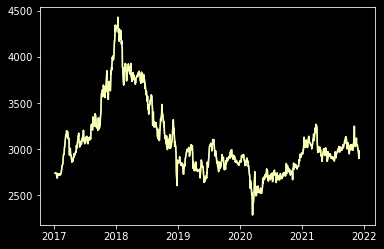

In [3]:
test=Rl_env(1301,scaler = StandardScaler())
num_points = test.full_dataset.shape[0]-test.period_length

new_dataset = make_simple_dataset(num_points,test)

plt.figure()
plt.plot(new_dataset['y_inv_trans'])
plt.plot(test.full_dataset['Close'])


In [4]:
import keras